In [207]:
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
import json

turning an image into array

In [208]:
temp_img = load_img('./cropped/0.jpg', color_mode='grayscale')

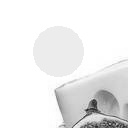

In [209]:
temp_img

In [210]:
temp_img_array = img_to_array(temp_img)

In [211]:
temp_img_array.shape

(128, 128, 1)

In [212]:
def generate_dataset():
    X = []
    Y = []
    
    # X
    for f in glob.glob('./cropped/*.jpg'):
        temp_img = load_img(f, color_mode='grayscale')
        arr      = img_to_array(temp_img)
        X.append(arr)
    X = np.asarray(X)
    X = X.astype('float32')
    X = X / 255.0
    
    # Y
    with open('labels.json') as f:
        data = json.load(f)
    for d in data:
        y = [d['center'][0]/128.0, d['center'][1]/128.0, d['radius']/128.0]
        Y.append(y)
    Y = np.asarray(Y)
    Y = Y.astype('float32')
    return X, Y

In [213]:
X, Y = generate_dataset()

In [215]:
X.shape

(2044, 128, 128, 1)

In [216]:
Y.shape

(2044, 3)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=111)


In [222]:
# CNNを構築
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))       
model.add(Activation('relu'))
# コンパイル
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])



In [223]:
# 実行。出力はなしで設定(verbose=0)。
history = model.fit(X_train, y_train, batch_size=10, epochs=100,
                   validation_data = (X_test, y_test))


Epoch 1/100
137/137 [==============================] - 5s 22ms/step - loss: 0.7223 - mean_squared_error: 0.7223 - val_loss: 0.1829 - val_mean_squared_error: 0.1829
Epoch 2/100
137/137 [==============================] - 3s 18ms/step - loss: 0.1785 - mean_squared_error: 0.1785 - val_loss: 0.1829 - val_mean_squared_error: 0.1829
Epoch 3/100
137/137 [==============================] - 3s 18ms/step - loss: 0.1752 - mean_squared_error: 0.1752 - val_loss: 0.1764 - val_mean_squared_error: 0.1764
Epoch 4/100
137/137 [==============================] - 3s 18ms/step - loss: 0.1809 - mean_squared_error: 0.1809 - val_loss: 0.1649 - val_mean_squared_error: 0.1649
Epoch 5/100
137/137 [==============================] - 3s 20ms/step - loss: 0.1777 - mean_squared_error: 0.1777 - val_loss: 0.1695 - val_mean_squared_error: 0.1695
Epoch 6/100
137/137 [==============================] - 3s 20ms/step - loss: 0.1762 - mean_squared_error: 0.1762 - val_loss: 0.1752 - val_mean_squared_error: 0.1752
Epoch 7/100
137/

Epoch 51/100
137/137 [==============================] - 3s 19ms/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 52/100
137/137 [==============================] - 3s 19ms/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 53/100
137/137 [==============================] - 3s 18ms/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 54/100
137/137 [==============================] - 2s 18ms/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 55/100
137/137 [==============================] - 2s 18ms/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 56/100
137/137 [==============================] - 2s 18ms/step - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 57/1

137/137 [==============================] - 3s 21ms/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0171 - val_mean_squared_error: 0.0171


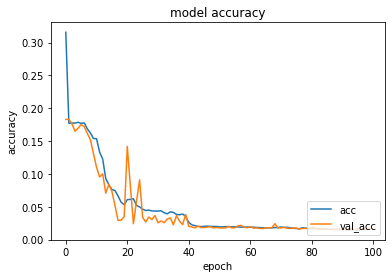

In [224]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

In [225]:
y_train[0]

array([0.578125 , 0.5390625, 0.0703125], dtype=float32)

In [228]:
model.predict(X_test)[:10]

array([[0.3909514 , 0.46525574, 0.        ],
       [0.4672473 , 0.4731054 , 0.        ],
       [0.42031443, 0.5760138 , 0.        ],
       [0.44508836, 0.5134455 , 0.        ],
       [0.36048537, 0.53121275, 0.        ],
       [0.47283915, 0.5132846 , 0.        ],
       [0.4149496 , 0.50312054, 0.        ],
       [0.37811238, 0.5147178 , 0.        ],
       [0.3473521 , 0.41830486, 0.        ],
       [0.5380582 , 0.51163   , 0.        ]], dtype=float32)

In [227]:
y_test[:10]

array([[0.4921875, 0.5078125, 0.15625  ],
       [0.609375 , 0.4921875, 0.046875 ],
       [0.34375  , 0.5625   , 0.1640625],
       [0.3515625, 0.46875  , 0.1484375],
       [0.40625  , 0.453125 , 0.0625   ],
       [0.5234375, 0.5078125, 0.2734375],
       [0.6171875, 0.578125 , 0.1640625],
       [0.40625  , 0.5390625, 0.0625   ],
       [0.46875  , 0.40625  , 0.296875 ],
       [0.6171875, 0.5      , 0.1953125]], dtype=float32)

https://jp.mathworks.com/help/deeplearning/ug/train-a-convolutional-neural-network-for-regression.html

In [ ]:
#TODO: Normalization?
